In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
dates = pd.date_range(start='1990-01-01', periods=100, freq='M') #Make a column of dates
dates = pd.to_datetime(dates) #Tell Pandas to treat the column as a datetime object
values = np.cumsum(np.random.randn(100)) #Create a random walk
df = pd.DataFrame({'Date': dates, 'Value': values})
df.set_index('Date', inplace=True) 

In [6]:
forecast_periods = 10

In [8]:
mean_value = df['Value'].mean()
forecast_values = pd.Series([mean_value] * forecast_periods)

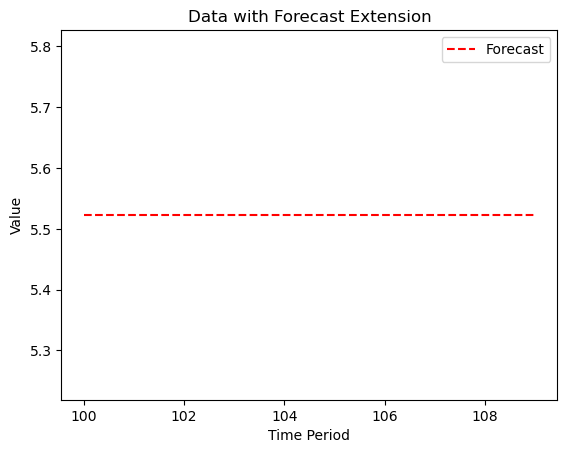

In [9]:
forecast_index = range(len(df), len(df) + forecast_periods)
plt.plot(forecast_index, forecast_values, color='red', linestyle='--', label='Forecast')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.title('Data with Forecast Extension')
plt.legend()
plt.show()

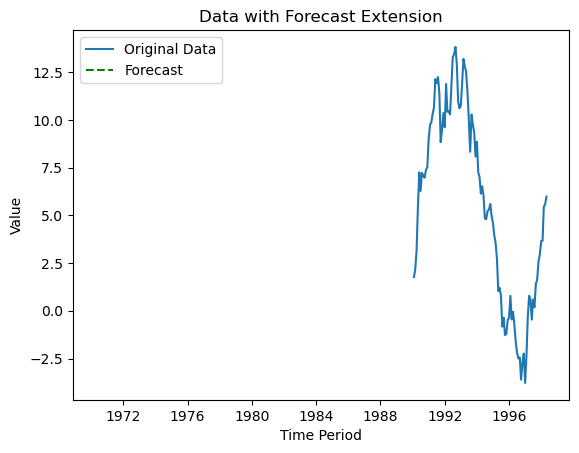

In [11]:
last_value = df['Value'].iloc[-1]

forecast_periods = 10
forecast_values = pd.Series([last_value] * forecast_periods)

plt.plot(df['Value'], label='Original Data')

#Adjusting the index for the forecast data to plot it correctly
forecast_index = range(len(df), len(df) + forecast_periods)
plt.plot(forecast_index, forecast_values, color='green', linestyle='--', label='Forecast')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.title('Data with Forecast Extension')
plt.legend()
plt.show()

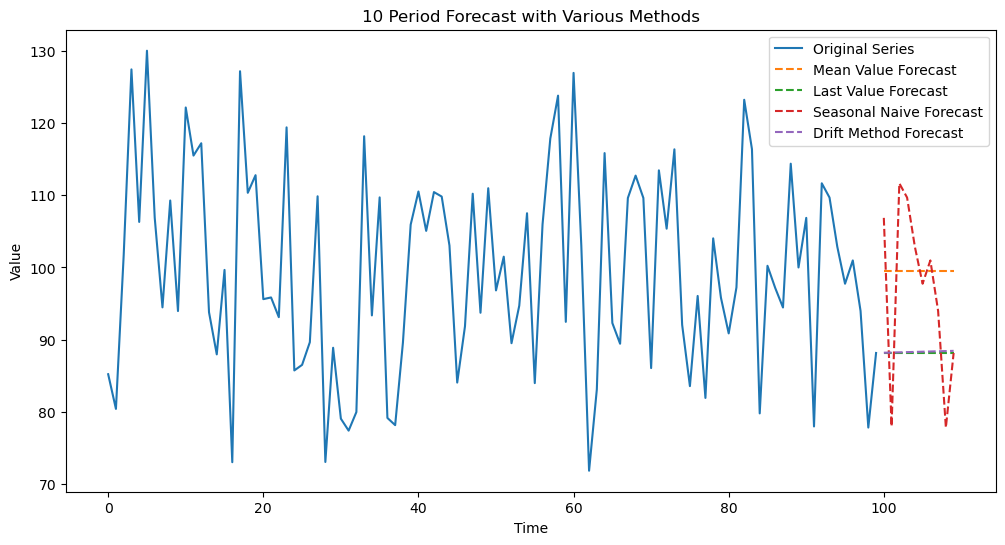

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a sample DataFrame
data = {'Value': np.random.normal(100, 15, 100)}  # 100 random values with mean around 100 and std deviation of 15
df = pd.DataFrame(data)

# Forecast using the mean value
mean_value = df['Value'].mean()
mean_forecast = [mean_value] * 10

# Forecast using the last value
last_value = df['Value'].iloc[-1]
last_value_forecast = [last_value] * 10

# Seasonal naive forecast (assuming seasonality period is 10)
seasonality_period = 10
seasonal_naive_forecast = df['Value'][-seasonality_period:].tolist() * (12 // seasonality_period)

# Drift method forecast
n = len(df)
drift = (df['Value'].iloc[-1] - df['Value'].iloc[0]) / n
drift_forecast = [df['Value'].iloc[-1] + drift * i for i in range(1, 11)]

# Creating a time series index for the forecast
last_index = df.index[-1]
forecast_index = pd.RangeIndex(start=last_index + 1, stop=last_index + 11)

# Plotting all forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Original Series')
plt.plot(forecast_index, mean_forecast, label='Mean Value Forecast', linestyle='--')
plt.plot(forecast_index, last_value_forecast, label='Last Value Forecast', linestyle='--')
plt.plot(forecast_index, seasonal_naive_forecast, label='Seasonal Naive Forecast', linestyle='--')
plt.plot(forecast_index, drift_forecast, label='Drift Method Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('10 Period Forecast with Various Methods')
plt.legend()
plt.show()
